In [1]:
import sys, os
sys.path.append('../src')
from copulae1 import *
import itertools
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
from KDEs import *

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
data = pd.read_csv('../data/btc future and reference rate/coingecko_future.csv')
rs = data.loc[:, 'log return bitcoin']
rf = data.loc[:, 'log return future']

In [10]:
i = -440
data.iloc[i:i+300,:].head()
# data.iloc[i:i+300,].tail()

Unnamed: 0        Date  bitcoin price    Close  log return bitcoin  \
238         238  2020-02-25    9383.519614   9435.0           -0.023245   
239         239  2020-02-24    9604.189826   9745.0           -0.004778   
240         240  2020-02-21    9650.190496   9885.0            0.002843   
241         241  2020-02-20    9622.790868   9760.0            0.004456   
242         242  2020-02-19    9580.008329  10395.0           -0.047606   

     log return future  
238          -0.032328  
239          -0.014264  
240           0.012726  
241          -0.063033  
242          -0.001922

In [11]:
data.iloc[i:i+300,:].tail()


Unnamed: 0        Date  bitcoin price   Close  log return bitcoin  \
533         533  2018-12-20    3991.345242  3875.0            0.083263   
534         534  2018-12-19    3672.472621  3695.0            0.036056   
535         535  2018-12-18    3542.415216  3495.0            0.013638   
536         536  2018-12-17    3494.430092  3530.0            0.092153   
537         537  2018-12-14    3186.801436  3145.0           -0.030534   

     log return future  
533           0.047565  
534           0.055647  
535          -0.009964  
536           0.115484  
537          -0.022013

In [12]:
# _rs = rs.copy()
_rs = data.iloc[i:i+300,4]
_rs.reset_index(drop=True, inplace=True)

# _rf = rf.copy()
_rf = data.iloc[i:i+300,5]
_rf.reset_index(drop=True, inplace=True)

contamination = (-0.2,0.2)
_rs_c = _rs.append(pd.Series([contamination[0]]), ignore_index= True)
_rf_c = _rf.append(pd.Series([contamination[1]]), ignore_index= True)

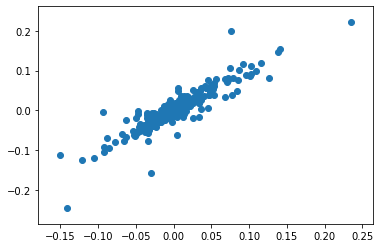

In [13]:
plt.scatter(_rs, _rf)
# plt.scatter(contamination[0], contamination[1])

In [14]:
def rho_Variance(rs, rf, h):
    rh = rs - h*rf
    return Variance(rh)

def rho_ERM10(rs, rf, h):
    rh = rs - h*rf
    return ERM_estimate_trapezoidal(10, rh)

def rho_ES1(rs, rf, h):
    rh = rs - h*rf
    return ES(0.01, rh)

def rho_ES5(rs, rf, h):
    rh = rs - h*rf
    return ES(0.05, rh)

def rho_VaR1(rs, rf, h):
    rh = rs - h*rf
    return VaR(0.01, rh)

def rho_VaR5(rs, rf, h):
    rh = rs - h*rf
    return VaR(0.05, rh)

x0=0.9
print(scipy.optimize.fmin(lambda h: rho_Variance(_rs_c,_rf_c, h), x0=0.5)- 
scipy.optimize.fmin(lambda h: rho_Variance(_rs,_rf, h), x0))

print(scipy.optimize.fmin(lambda h: rho_ERM10(_rs_c,_rf_c, h), x0=0.5)- 
scipy.optimize.fmin(lambda h: rho_ERM10(_rs,_rf, h), x0))

print(scipy.optimize.fmin(lambda h: rho_ES1(_rs_c,_rf_c, h), x0=0.5)- 
scipy.optimize.fmin(lambda h: rho_ES1(_rs,_rf, h), x0))

print(scipy.optimize.fmin(lambda h: rho_ES5(_rs_c,_rf_c, h), x0=0.5)- 
scipy.optimize.fmin(lambda h: rho_ES5(_rs,_rf, h), x0))

print(scipy.optimize.fmin(lambda h: rho_VaR5(_rs_c,_rf_c, h), x0=0.5)- 
scipy.optimize.fmin(lambda h: rho_VaR5(_rs,_rf, h), x0))

print(scipy.optimize.fmin(lambda h: rho_VaR5(_rs_c,_rf_c, h), x0=0.5)- 
scipy.optimize.fmin(lambda h: rho_VaR5(_rs,_rf, h), x0))

Optimization terminated successfully.
         Current function value: 0.000721
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.000305
         Iterations: 12
         Function evaluations: 24
[-0.10499023]
Optimization terminated successfully.
         Current function value: 0.029556
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.023115
         Iterations: 13
         Function evaluations: 26
[-0.0178418]
Optimization terminated successfully.
         Current function value: 0.135259
         Iterations: 11
         Function evaluations: 22
Optimization terminated successfully.
         Current function value: 0.072952
         Iterations: 14
         Function evaluations: 28
[-0.05200195]
Optimization terminated successfully.
         Current function value: 0.061249
         Iterations: 13
         Function evaluatio

In [15]:
np.min([rs,rf])

-0.288461890837538

In [16]:
np.max([rs,rf])

0.2352239225856059

In [17]:
# rs_c_arr = np.linspace(np.min([rs,rf]), np.max([rs,rf]), 30)
# rf_c_arr = np.linspace(np.min([rs,rf]), np.max([rs,rf]), 30)

rs_c_arr = np.linspace(-0.3, 0.3, 30)
rf_c_arr = np.linspace(-0.3, 0.3, 30)

In [18]:
rs_c_arr 

array([-0.3       , -0.27931034, -0.25862069, -0.23793103, -0.21724138,
       -0.19655172, -0.17586207, -0.15517241, -0.13448276, -0.1137931 ,
       -0.09310345, -0.07241379, -0.05172414, -0.03103448, -0.01034483,
        0.01034483,  0.03103448,  0.05172414,  0.07241379,  0.09310345,
        0.1137931 ,  0.13448276,  0.15517241,  0.17586207,  0.19655172,
        0.21724138,  0.23793103,  0.25862069,  0.27931034,  0.3       ])

In [19]:
contamination = pd.DataFrame((itertools.product(*[rs_c_arr, rf_c_arr])))
print(len(contamination))

900


In [20]:
IF_Variance = []
IF_ERM10 = []
IF_ES1 = []
IF_ES5 = []
IF_VaR1 = []
IF_VaR5 = []

old_h_Variance = scipy.optimize.fmin(lambda h: rho_Variance(_rs,_rf, h), x0=0.5)
old_h_ERM10 = scipy.optimize.fmin(lambda h: rho_ERM10(_rs,_rf, h), x0=0.5)
old_h_ES1 = scipy.optimize.fmin(lambda h: rho_ES1(_rs,_rf, h), x0=0.5)
old_h_ES5 = scipy.optimize.fmin(lambda h: rho_ES5(_rs,_rf, h), x0=0.5)
old_h_VaR1 = scipy.optimize.fmin(lambda h: rho_VaR1(_rs,_rf, h), x0=0.5)
old_h_VaR5 = scipy.optimize.fmin(lambda h: rho_VaR5(_rs,_rf, h), x0=0.5)


# for i in range(len(contamination)):
#     print(i)
#     c = contamination.iloc[i,:]
#     _rs_c = _rs.append(pd.Series([c.loc[0]]), ignore_index= True)
#     _rf_c = _rf.append(pd.Series([c.loc[1]]), ignore_index= True)

#     new_h_Variance = scipy.optimize.fmin(lambda h: rho_Variance(_rs_c,_rf_c, h), x0=0.5,disp=False)
#     new_h_ERM10 = scipy.optimize.fmin(lambda h: rho_ERM10(_rs_c,_rf_c, h), x0=0.5,disp=False)
#     new_h_ES1 = scipy.optimize.fmin(lambda h: rho_ES1(_rs_c,_rf_c, h), x0=0.5,disp=False)
#     new_h_ES5 = scipy.optimize.fmin(lambda h: rho_ES5(_rs_c,_rf_c, h), x0=0.5,disp=False)
#     new_h_VaR1 = scipy.optimize.fmin(lambda h: rho_VaR1(_rs_c,_rf_c, h), x0=0.5,disp=False)
#     new_h_VaR5 = scipy.optimize.fmin(lambda h: rho_VaR5(_rs_c,_rf_c, h), x0=0.5,disp=False)

#     IF_Variance.append(new_h_Variance-old_h_Variance)
#     IF_ERM10.append(new_h_ERM10-old_h_ERM10)
#     IF_ES1.append(new_h_ES1-old_h_ES1)
#     IF_ES5.append(new_h_ES5-old_h_ES5)
#     IF_VaR1.append(new_h_VaR1-old_h_VaR1)
#     IF_VaR5.append(new_h_VaR5-old_h_VaR5)

Optimization terminated successfully.
         Current function value: 0.000305
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.023115
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.072952
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.041861
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.045672
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.029656
         Iterations: 11
         Function evaluations: 22


In [23]:
new_h_arr = []

kde_rs = KDE(_rs, 'Gaussian')
kde_rf = KDE(_rf, 'Gaussian')
u = ECDF(_rs)(_rs)
v = ECDF(_rf)(_rf)

C = t_Copula({'rho':0.9, 'nu':2}, kde_rs, kde_rf, 2)
# C.mm_calibrate(u,v, [0.05,0.1,0.9,0.95])
C.canonical_calibrate(u,v)
old_h = np.array(optimize_h(C, [10], [0.01,0.05], [0.01,0.05]))

# for i in range(len(contamination)):
#     print(i)
#     c = contamination.iloc[i,:]
#     _rs_c = _rs.append(pd.Series([c.loc[0]]), ignore_index= True)
#     _rf_c = _rf.append(pd.Series([c.loc[1]]), ignore_index= True)

#     kde_rs_c = KDE(_rs_c, 'Gaussian')
#     kde_rf_c = KDE(_rf_c, 'Gaussian')
#     u_c = ECDF(_rs_c)(_rs_c)
#     v_c = ECDF(_rf_c)(_rf_c)

#     C = t_Copula({'rho':0.9, 'nu':2}, kde_rs_c, kde_rf_c, 2)
# #     C.mm_calibrate(u_c,v_c, [0.05,0.1,0.9,0.95])
#     C.canonical_calibrate(u_c,v_c)

#     new_h = np.array(optimize_h(C, [10], [0.01,0.05], [0.01,0.05]))
#     new_h_arr.append(new_h)

Optimization terminated successfully.
         Current function value: -1.035591
         Iterations: 120
         Function evaluations: 226
Optimization terminated successfully.
         Current function value: 0.000282
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.023132
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.063627
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.036281
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.042595
         Iterations: 13
         Function evaluations: 27
Optimization terminated successfully.
         Current function value: 0.022126
         Iterations: 13
         Function evaluations: 27


In [1051]:
# new_h = np.array(new_h_arr)
# np.save('OHR_c_MLE.npy', new_h)

In [24]:
new_h = np.load('OHR_c_MLE.npy')

In [25]:
IF_Variance = (new_h - old_h)[:,0]
IF_ERM10 = (new_h - old_h)[:,1]
IF_ES1 = (new_h - old_h)[:,2]
IF_ES5 = (new_h - old_h)[:,3]
IF_VaR1 = (new_h - old_h)[:,4]
IF_VaR5 = (new_h - old_h)[:,5]

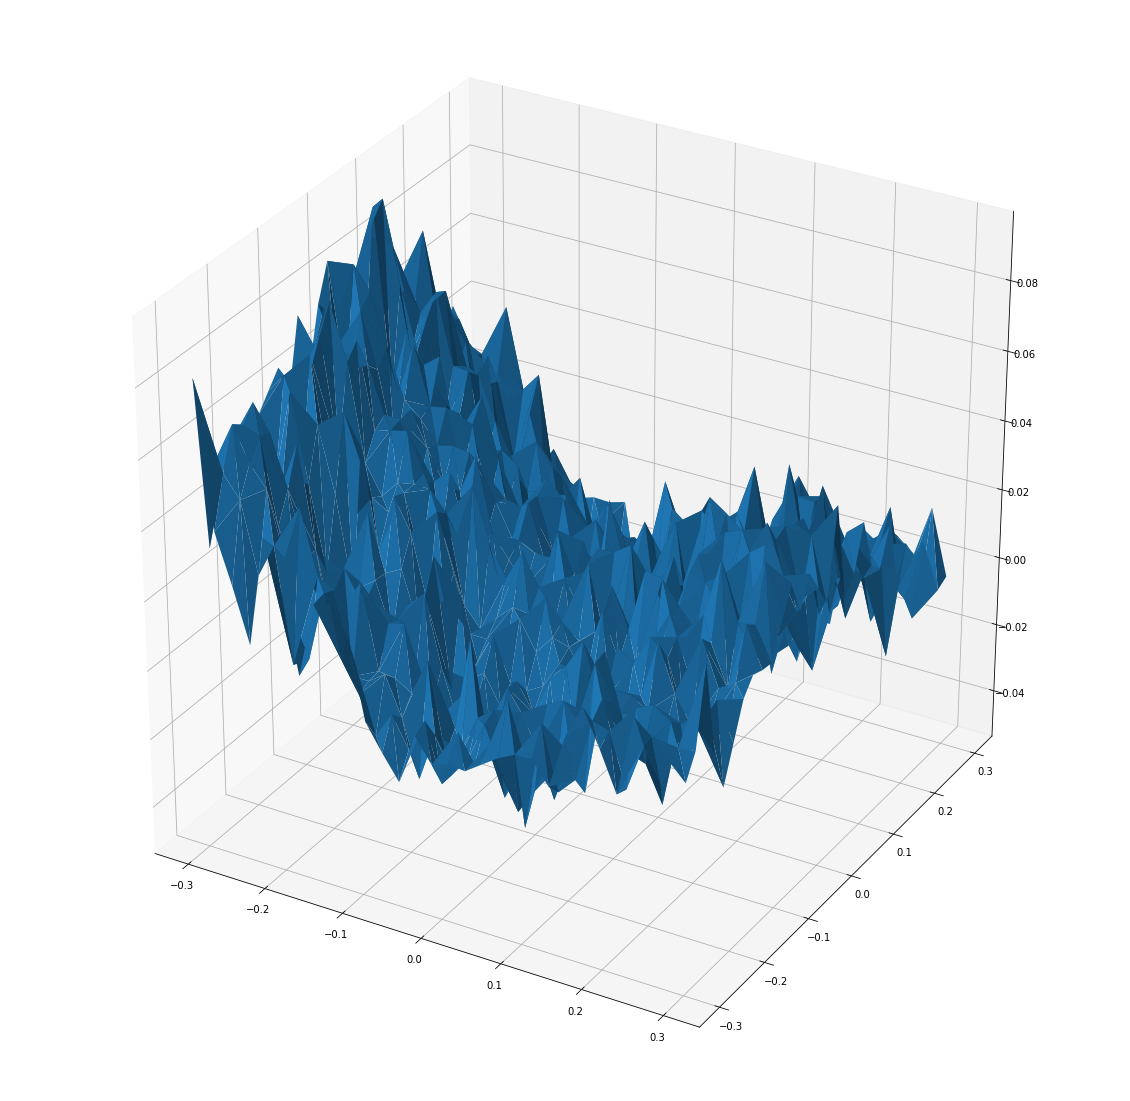

In [26]:
fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')

# ax.plot_trisurf(contamination.loc[:,0], contamination.loc[:,1], np.array(IF_Variance).flatten())
ax.plot_trisurf(contamination.loc[:,0], contamination.loc[:,1], np.array(IF_ERM10).flatten())
# ax.plot_trisurf(contamination.loc[:,0], contamination.loc[:,1], np.array(IF_ES1).flatten())
# ax.plot_trisurf(contamination.loc[:,0], contamination.loc[:,1], np.array(IF_ES5).flatten())
# ax.plot_trisurf(contamination.loc[:,0], contamination.loc[:,1], np.array(IF_VaR1).flatten())
# ax.plot_trisurf(contamination.loc[:,0], contamination.loc[:,1], np.array(IF_VaR5).flatten())

In [35]:
toplot = pd.DataFrame({'x':contamination.iloc[:,0],'y':contamination.iloc[:,1], 'z':np.array(IF_ES1).flatten()} )
toplot = pd.pivot_table(toplot, values='z', index='x', columns='y')

toplot2 = pd.DataFrame({'x':contamination.iloc[:,0],'y':contamination.iloc[:,1], 'z':np.array(IF_VaR1).flatten()} )
toplot2 = pd.pivot_table(toplot2, values='z', index='x', columns='y')

In [36]:
import plotly.graph_objects as go

colors1 = np.zeros(shape=toplot.shape)    
colors2 = np.ones(shape=toplot2.shape)    

cmap = plt.get_cmap("tab10")
colorscale = [[0, 'rgb' + str(cmap(1)[0:3])], 
              [1, 'rgb' + str(cmap(2)[0:3])]]

fig = go.Figure()

fig.add_trace(go.Surface(
    contours = {},
    x = list(toplot.index),
    y = list(toplot.columns),
    z = toplot.values, 
    surfacecolor =colors1,
    colorscale=colorscale,
    cmin=0, cmax=1, opacity=.7))

fig.add_trace(go.Surface(
    contours = {},
    x = list(toplot2.index),
    y = list(toplot2.columns),
    z = toplot2.values, 
    surfacecolor =colors2,
    colorscale=colorscale,
    cmin=0, cmax=1, opacity=.7))

fig.update_traces(showscale=False)
fig.show()


In [978]:
u = ECDF(contamination.iloc[:,0])(contamination.iloc[:,0])
v = ECDF(contamination.iloc[:,1])(contamination.iloc[:,1])


toplot = pd.DataFrame({'x':u,'y':v, 'z':np.array(IF_VaR1).flatten()} )
toplot = pd.pivot_table(toplot, values='z', index='x', columns='y')

toplot2 = pd.DataFrame({'x':u,'y':v, 'z':np.array(IF_VaR5).flatten()} )
toplot2 = pd.pivot_table(toplot2, values='z', index='x', columns='y')

In [1029]:
import plotly.graph_objects as go

colors1 = np.zeros(shape=toplot.shape)    
colors2 = np.ones(shape=toplot2.shape)    

cmap = plt.get_cmap("tab10")
colorscale = [[0, 'rgb' + str(cmap(1)[0:3])], 
              [1, 'rgb' + str(cmap(2)[0:3])]]

fig = go.Figure()

fig.add_trace(go.Surface(
    contours = {},
    x = list(toplot.index),
    y = list(toplot.columns),
    z = toplot.values, 
    surfacecolor =colors1,
    colorscale=colorscale,
    cmin=0, cmax=1, opacity=.7))

fig.add_trace(go.Surface(
    contours = {},
    x = list(toplot2.index),
    y = list(toplot2.columns),
    z = toplot2.values, 
    surfacecolor =colors2,
    colorscale=colorscale,
    cmin=0, cmax=1, opacity=.7))


fig.update_traces(showscale=False)
fig.show()


In [1030]:
from KDEs import *

contamination = (0.2,-0.2)
_rs_c = _rs.append(pd.Series([contamination[0]]), ignore_index= True)
_rf_c = _rf.append(pd.Series([contamination[1]]), ignore_index= True)

u = ECDF(_rs)(_rs)
v = ECDF(_rf)(_rf)
kde_rs = KDE(_rs, 'Gaussian')
kde_rf = KDE(_rf, 'Gaussian')

u_c = ECDF(_rs_c)(_rs_c)
v_c = ECDF(_rf_c)(_rf_c)
kde_rs_c = KDE(_rs_c, 'Gaussian')
kde_rf_c = KDE(_rf_c, 'Gaussian')
q_arr = [0.05,0.1,0.9,0.95]


(-0.3, 0.3)

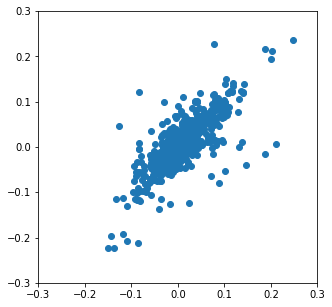

In [1031]:
C = t_Copula({'rho':0.8, 'nu':2}, kde_rs_c, kde_rf_c, 2)
s = C.sample(1000)
plt.figure(figsize=(5,5))
plt.scatter(s[:,0], s[:,1])
plt.xlim((-0.3,0.3))
plt.ylim((-0.3,0.3))

(-0.3, 0.3)

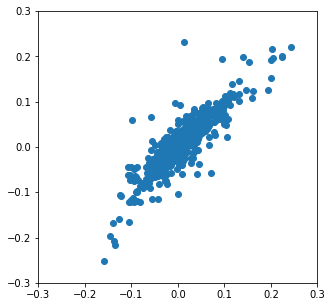

In [1032]:
C = t_Copula({'rho':0.9, 'nu':2}, kde_rs_c, kde_rf_c, 2)
s = C.sample(1000)
plt.figure(figsize=(5,5))
plt.scatter(s[:,0], s[:,1])
plt.xlim((-0.3,0.3))
plt.ylim((-0.3,0.3))

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



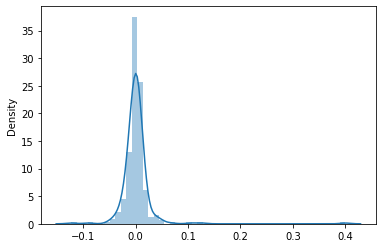

In [1033]:
sns.distplot(_rs_c - _rf_c)

0.8241206030150754
0.7185929648241205


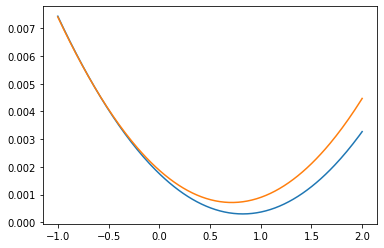

In [1034]:
h_arr = np.linspace(-1,2,200)
results = [rho_Variance(_rs, _rf, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])

results = [rho_Variance(_rs_c, _rf_c, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])

0.8241206030150754
0.8241206030150754


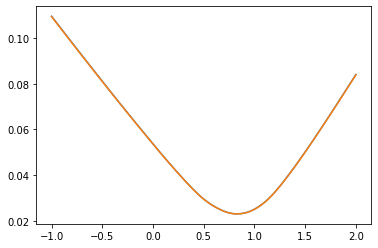

In [1035]:
results = [rho_ERM10(_rs, _rf, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])
results = [rho_ERM10(_rs_c, _rf_c, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])

0.6281407035175879
0.6281407035175879


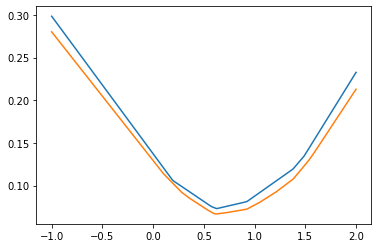

In [1036]:
results = [rho_ES1(_rs, _rf, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])
results = [rho_ES1(_rs_c, _rf_c, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])

0.793969849246231
0.793969849246231


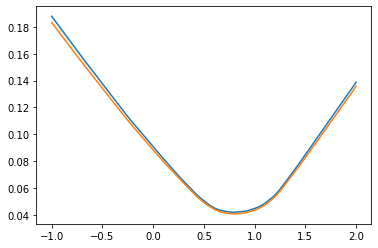

In [1037]:
results = [rho_ES5(_rs, _rf, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])

results = [rho_ES5(_rs_c, _rf_c, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])

1.0351758793969847
1.0351758793969847


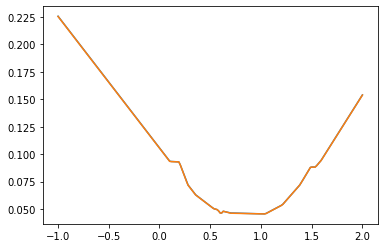

In [1038]:
results = [rho_VaR1(_rs, _rf, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])

results = [rho_VaR1(_rs_c, _rf_c, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])

0.8090452261306531
0.8090452261306531


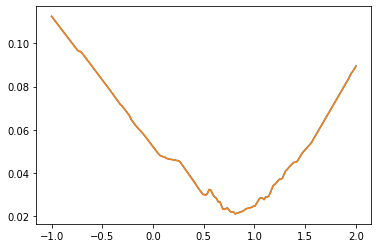

In [1039]:
results = [rho_VaR5(_rs, _rf, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])

results = [rho_VaR5(_rs_c, _rf_c, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])

In [29]:
contamination = pd.DataFrame((itertools.product(*[rs_c_arr, rf_c_arr])))

dx=dy=contamination.iloc[1,1] - contamination.iloc[0,1]

In [30]:
print(np.min(np.array(IF_ERM10).flatten()))
print(np.min(np.array(IF_Variance).flatten()))
print(np.min(np.array(IF_ES1).flatten()))
print(np.min(np.array(IF_ES5).flatten()))
print(np.min(np.array(IF_VaR1).flatten()))
print(np.min(np.array(IF_VaR5).flatten()))

-0.05078125
-0.05478515625000002
-0.06474609374999984
-0.05332031250000002
-0.07128906250000011
-0.050488281250000044


In [31]:
print(np.max(np.array(IF_ERM10).flatten()))
print(np.max(np.array(IF_Variance).flatten()))
print(np.max(np.array(IF_ES1).flatten()))
print(np.max(np.array(IF_ES5).flatten()))
print(np.max(np.array(IF_VaR1).flatten()))
print(np.max(np.array(IF_VaR5).flatten()))

0.09628906250000013
0.1019531250000002
0.27314453125000027
0.1181640625
0.22041015625000016
0.08183593750000007


In [32]:
import matplotlib.colors as colors
import matplotlib.cm as cm

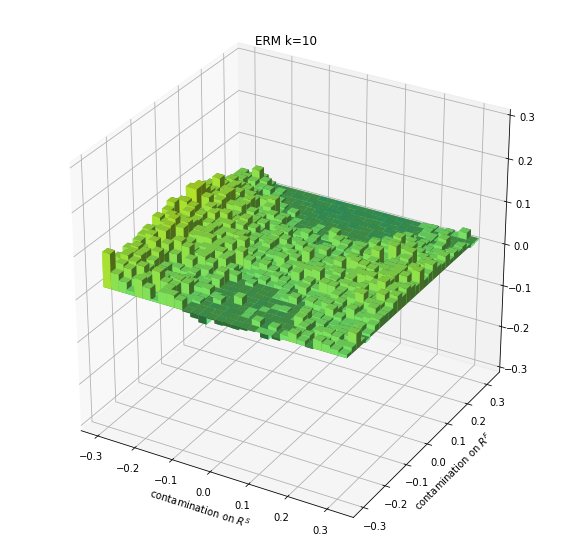

In [52]:
dz = np.array(IF_ERM10).flatten()
offset = dz 
fracs = offset.astype(float)
norm = colors.Normalize(-0.5, 0.5)
color_values = cm.jet(norm(fracs.tolist()))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(contamination.iloc[:,0],
         contamination.iloc[:,1],
         0.0222, dx, dy, dz,
         color=color_values)
ax.set_zlim((-0.3, 0.3))
ax.set_xlabel(r'contamination on $R^S$')
ax.set_ylabel(r'contamination on $R^F$')
plt.title("ERM k=10")
# plt.savefig('../latex/_pics/IF_plots/ERM10_t_copula_MLE.pdf')
plt.savefig('plots/IF_ERM10_t_copula_MLE.png', transparent=True)
plt.show()


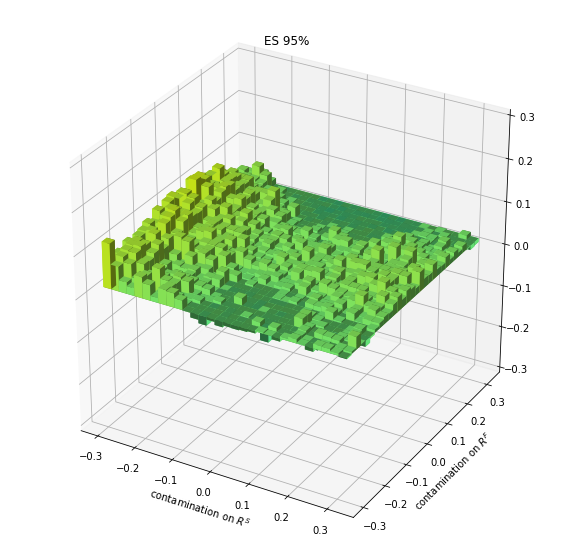

In [53]:
dz = np.array(IF_ES5).flatten()
offset = dz 
fracs = offset.astype(float)
norm = colors.Normalize(-0.5, 0.5)
color_values = cm.jet(norm(fracs.tolist()))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(contamination.iloc[:,0],
         contamination.iloc[:,1],
         0.0222, dx, dy, dz,
         color=color_values)
ax.set_zlim((-0.3, 0.3))
ax.set_xlabel(r'contamination on $R^S$')
ax.set_ylabel(r'contamination on $R^F$')
# plt.savefig('../latex/_pics/IF_plots/ES5_t_copula_MLE.pdf')
plt.title('ES 95%')
plt.savefig('plots/IF_ES_95_t_copula_MLE.png', transparent=True)
plt.show()


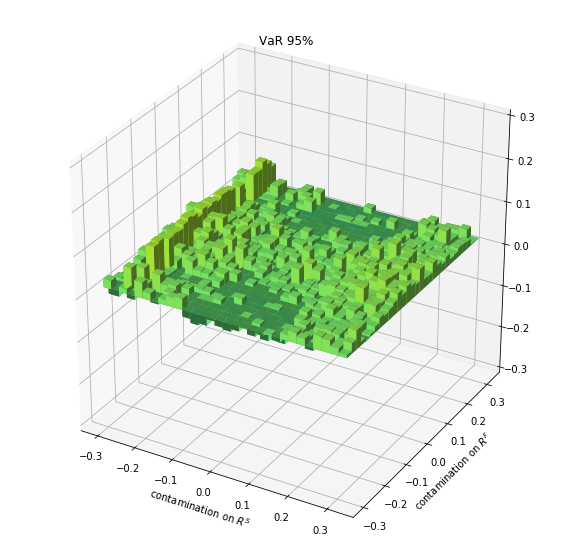

In [54]:
dz = np.array(IF_VaR5).flatten()
offset = dz 
fracs = offset.astype(float)
norm = colors.Normalize(-0.5, 0.5)
color_values = cm.jet(norm(fracs.tolist()))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(contamination.iloc[:,0],
         contamination.iloc[:,1],
         0.0222, dx, dy, dz,
         color=color_values)
ax.set_zlim((-0.3, 0.3))
ax.set_xlabel(r'contamination on $R^S$')
ax.set_ylabel(r'contamination on $R^F$')
# plt.savefig('../latex/_pics/IF_plots/VaR5_t_copula_MLE.pdf')

plt.title('VaR 95%')
plt.savefig('plots/IF_VaR_95_t_copula_MLE.png', transparent=True)

plt.show()


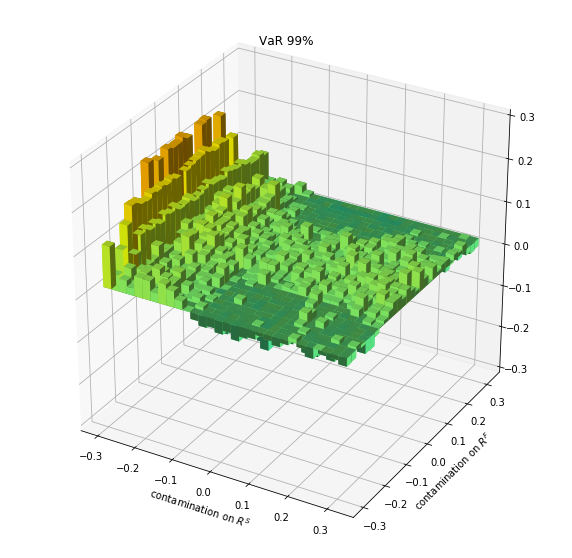

In [55]:
dz = np.array(IF_VaR1).flatten()
offset = dz 
fracs = offset.astype(float)
norm = colors.Normalize(-0.5, 0.5)
color_values = cm.jet(norm(fracs.tolist()))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(contamination.iloc[:,0],
         contamination.iloc[:,1],
         0.0222, dx, dy, dz,
         color=color_values)
ax.set_zlim((-0.3, 0.3))
ax.set_xlabel(r'contamination on $R^S$')
ax.set_ylabel(r'contamination on $R^F$')
# plt.savefig('../latex/_pics/IF_plots/VaR1_t_copula_MLE.pdf')


plt.title('VaR 99%')
plt.savefig('plots/IF_VaR_99_t_copula_MLE.png', transparent=True)
plt.show()


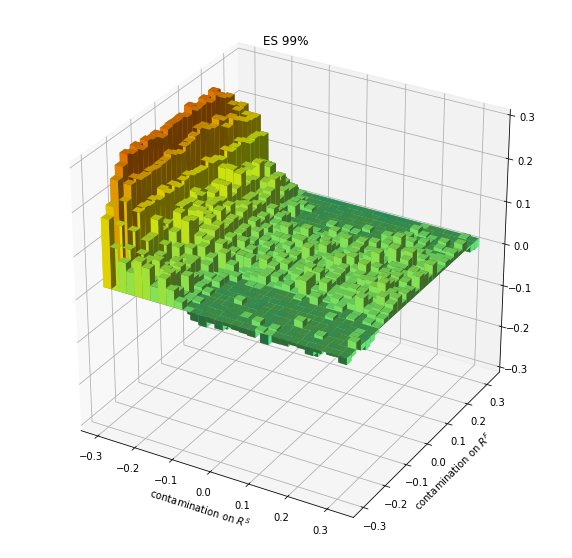

In [56]:
dz = np.array(IF_ES1).flatten()
offset = dz 
fracs = offset.astype(float)
norm = colors.Normalize(-0.5, 0.5)
color_values = cm.jet(norm(fracs.tolist()))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(contamination.iloc[:,0],
         contamination.iloc[:,1],
         0.0222, dx, dy, dz,
         color=color_values)
ax.set_zlim((-0.3, 0.3))
ax.set_xlabel(r'contamination on $R^S$')
ax.set_ylabel(r'contamination on $R^F$')
# plt.savefig('../latex/_pics/IF_plots/ES1_t_copula_MLE.pdf')


plt.title('ES 99%')
plt.savefig('plots/IF_ES_99_t_copula_MLE.png', transparent=True)
plt.show()


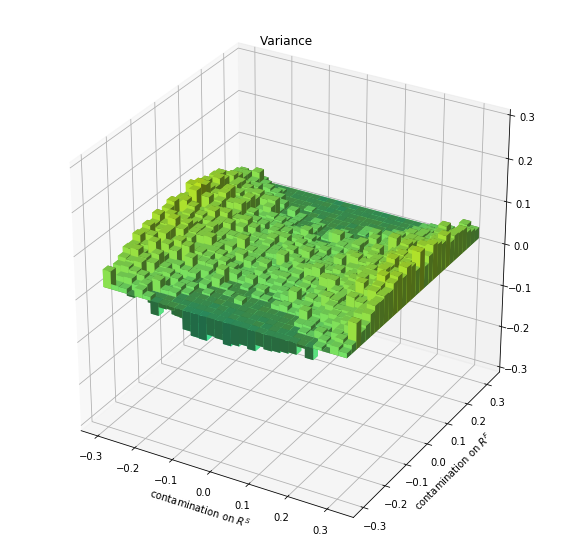

In [57]:
dz = np.array(IF_Variance).flatten()
offset = dz 
fracs = offset.astype(float)
norm = colors.Normalize(-0.5, 0.5)
color_values = cm.jet(norm(fracs.tolist()))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(contamination.iloc[:,0],
         contamination.iloc[:,1],
         0.0222, dx, dy, dz,
         color=color_values)
ax.set_zlim((-0.3, 0.3))
ax.set_xlabel(r'contamination on $R^S$')
ax.set_ylabel(r'contamination on $R^F$')
# plt.savefig('../latex/_pics/IF_plots/Variance_t_copula_MLE.pdf')

plt.title('Variance')
plt.savefig('plots/IF_Variance_t_copula_MLE.png', transparent=True)
plt.show()


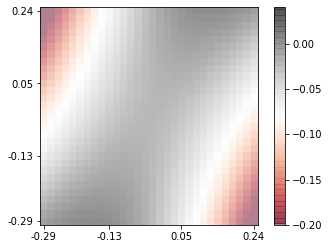

In [1006]:
toplot3 = contamination.copy()
toplot3.columns = ['rs', 'rf']
toplot3.loc[:,'IF'] = pd.Series(np.array(IF_Variance).flatten())
toplot3 = toplot3.pivot_table(index='rs', columns='rf', values='IF')

plt.imshow(toplot3, origin='lower',
           cmap='RdGy', alpha=0.5, vmin=-0.2, vmax=0.04)

plt.xticks(show_ticks,x_ticks)
plt.yticks(show_ticks,y_ticks)
plt.colorbar()